DSCI 100 Final Project Proposal
- Dataset: Wine Quality Dataset found on UCI

In [1]:
###
### Run this cell before continuing.
###

library(repr)
library(tidyverse)
library(tidymodels)
require(gridExtra)
options(repr.matrix.max.rows = 6)
source('tests.R')
source("cleanup.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [3]:
winequalityRed <- read_csv2("data/winequality-red.csv")
winequalityRed
winequalityWhite <- read_csv2("data/winequality-white.csv")
winequalityWhite

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (5): volatile acidity, citric acid, chlorides, density, sulphates
dbl (2): total sulfur dioxide, quality

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5
78,0.88,0,26,0.098,25,67,0.9968,32,0.68,98,5
78,0.76,0.04,23,0.092,15,54,0.997,326,0.65,98,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
63,0.51,0.13,23,0.076,29,40,0.99574,342,0.75,11,6
59,0.645,0.12,2,0.075,32,44,0.99547,357,0.71,102,5
6,0.31,0.47,36,0.067,18,42,0.99549,339,0.66,11,6


ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 4898 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (6): volatile acidity, citric acid, residual sugar, chlorides, density, ...
dbl (1): quality

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,88,6
63,0.3,0.34,1.6,0.049,14,132,0.994,33,0.49,95,6
81,0.28,0.4,6.9,0.05,30,97,0.9951,326,0.44,101,6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
65,0.24,0.19,1.2,0.041,30,111,0.99254,299,0.46,94,6
55,0.29,0.3,1.1,0.022,20,110,0.98869,334,0.38,128,7
6,0.21,0.38,0.8,0.02,22,98,0.98941,326,0.32,118,6


In [4]:
winequalityWhite <- mutate(winequalityWhite, type = "white")
winequalityWhite

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,88,6,white
63,0.3,0.34,1.6,0.049,14,132,0.994,33,0.49,95,6,white
81,0.28,0.4,6.9,0.05,30,97,0.9951,326,0.44,101,6,white
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
65,0.24,0.19,1.2,0.041,30,111,0.99254,299,0.46,94,6,white
55,0.29,0.3,1.1,0.022,20,110,0.98869,334,0.38,128,7,white
6,0.21,0.38,0.8,0.02,22,98,0.98941,326,0.32,118,6,white


In [5]:
winequalityRed <- mutate(winequalityRed, type = "red")
winequalityRed

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5,red
78,0.88,0,26,0.098,25,67,0.9968,32,0.68,98,5,red
78,0.76,0.04,23,0.092,15,54,0.997,326,0.65,98,5,red
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
63,0.51,0.13,23,0.076,29,40,0.99574,342,0.75,11,6,red
59,0.645,0.12,2,0.075,32,44,0.99547,357,0.71,102,5,red
6,0.31,0.47,36,0.067,18,42,0.99549,339,0.66,11,6,red


In [6]:
winequalityWhite <- mutate(winequalityWhite, quality = as.factor(quality))
winequalityWhite

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<fct>,<chr>
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,88,6,white
63,0.3,0.34,1.6,0.049,14,132,0.994,33,0.49,95,6,white
81,0.28,0.4,6.9,0.05,30,97,0.9951,326,0.44,101,6,white
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
65,0.24,0.19,1.2,0.041,30,111,0.99254,299,0.46,94,6,white
55,0.29,0.3,1.1,0.022,20,110,0.98869,334,0.38,128,7,white
6,0.21,0.38,0.8,0.02,22,98,0.98941,326,0.32,118,6,white


In [7]:
winequalityRed <- mutate(winequalityRed, quality = as.factor(quality))
winequalityRed

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<fct>,<chr>
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5,red
78,0.88,0,26,0.098,25,67,0.9968,32,0.68,98,5,red
78,0.76,0.04,23,0.092,15,54,0.997,326,0.65,98,5,red
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
63,0.51,0.13,23,0.076,29,40,0.99574,342,0.75,11,6,red
59,0.645,0.12,2,0.075,32,44,0.99547,357,0.71,102,5,red
6,0.31,0.47,36,0.067,18,42,0.99549,339,0.66,11,6,red


In [8]:
completedt <- rbind(winequalityRed, winequalityWhite) |>
              setNames(c("fixed_acidity",
                         "volatile_acidity",
                         "citric_acid",
                         "residual_sugar",
                         "chlorides",
                         "free_SO2",
                         "total_SO2",
                         "density",
                         "pH",
                         "sulphates",
                         "alcohol",
                         "quality",
                         "type"))
completedt$volatile_acidity <- as.numeric(completedt$volatile_acidity)
completedt$citric_acid <- as.numeric(completedt$citric_acid)
completedt$residual_sugar <- as.numeric(completedt$residual_sugar)
completedt$chlorides <- as.numeric(completedt$chlorides)
completedt$density <- as.numeric(completedt$density)
completedt$sulphates <- as.numeric(completedt$sulphates)
completedt

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_SO2,total_SO2,density,pH,sulphates,alcohol,quality,type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
74,0.70,0.00,19,0.076,11,34,0.9978,351,0.56,94,5,red
78,0.88,0.00,26,0.098,25,67,0.9968,32,0.68,98,5,red
78,0.76,0.04,23,0.092,15,54,0.9970,326,0.65,98,5,red
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
65,0.24,0.19,1.2,0.041,30,111,0.99254,299,0.46,94,6,white
55,0.29,0.30,1.1,0.022,20,110,0.98869,334,0.38,128,7,white
6,0.21,0.38,0.8,0.020,22,98,0.98941,326,0.32,118,6,white


In [86]:
red_pH_vs_quality <- ggplot(winequalityRed, aes(x = quality, y = pH)) +
    geom_boxplot() +
    ggtitle("pH vs Quality (Red)") +
    labs(x = "Quality", y = "pH") +
    theme(text=element_text(size=20))

In [87]:
white_pH_vs_quality <- ggplot(winequalityWhite, aes(x = quality, y = pH)) +
    geom_boxplot() +
    ggtitle("pH vs Quality (White)") +
    labs(x = "Quality", y = "pH") +
    theme(text=element_text(size=20))

In [103]:
white_quality_dis <- ggplot(winequalityWhite, aes(x = quality)) +
    geom_histogram(stat="count") +
    ggtitle("Quality Distribution (White)") +
    labs(x = "Quality", y = "Count") +
    theme(text=element_text(size=20))

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


In [104]:
red_quality_dis <- ggplot(winequalityRed, aes(x = quality)) +
    geom_histogram(stat="count") +
    ggtitle("Quality Distribution (Red)") +
    labs(x = "Quality", y = "Count") +
    theme(text=element_text(size=20))

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


In [90]:
fixed_acidity_dis <- ggplot(completedt, aes(x = fixed_acidity)) +
    geom_histogram(stat="count") +
    labs(x = "Fixed Acidity", y = "Count") +
    theme(text=element_text(size=20))

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


In [91]:
volatile_acidity_dis <- ggplot(completedt, aes(x = volatile_acidity)) +
    geom_histogram(stat="count") +
    labs(x = "Volatile Acidity", y = "Count") +
    theme(text=element_text(size=20))

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


In [92]:
citric_acid_dis <- ggplot(completedt, aes(x = citric_acid)) +
    geom_histogram(bins=30, stat="count") +
    labs(x = "Volatile Acidity", y = "Count") +
    theme(text=element_text(size=20))

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


In [93]:
residual_sugar_dis <- ggplot(completedt, aes(x = residual_sugar)) +
    geom_histogram(bins=30, stat="count") +
    labs(x = "Residual Sugar", y = "Count") +
    theme(text=element_text(size=20))

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


In [94]:
chlorides_dis <- ggplot(completedt, aes(x = chlorides)) +
    geom_histogram(bins=30, stat="count") +
    labs(x = "Chlorides", y = "Count") +
    theme(text=element_text(size=20))

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


In [95]:
free_SO2_dis <- ggplot(completedt, aes(x = free_SO2)) +
    geom_histogram(bins=30, stat="count") +
    labs(x = "Free SO2", y = "Count") +
    theme(text=element_text(size=20))

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


In [96]:
total_SO2_dis <- ggplot(completedt, aes(x = total_SO2)) +
    geom_histogram(bins=30, stat="count") +
    labs(x = "Total SO2", y = "Count") +
    theme(text=element_text(size=20))

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


In [97]:
density_dis <- ggplot(completedt, aes(x = density)) +
    geom_histogram(bins=30, stat="count") +
    labs(x = "Density", y = "Count") +
    theme(text=element_text(size=20)) 

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


In [98]:
pH_dis <- ggplot(completedt, aes(x = pH)) +
    geom_histogram(bins=30, stat="count") +
    labs(x = "pH", y = "Count") +
    theme(text=element_text(size=20)) 

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


In [99]:
sulphates_dis <- ggplot(completedt, aes(x = sulphates)) +
    geom_histogram(bins=30, stat="count") +
    labs(x = "Sulphates", y = "Count") +
    theme(text=element_text(size=20)) 

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


In [100]:
alcohol_dis <- ggplot(completedt, aes(x = alcohol)) +
    geom_histogram(bins=30) +
    labs(x = "Alcohol", y = "Count") +
    theme(text=element_text(size=20)) 

In [101]:
type_dis <- ggplot(completedt, aes(x = type)) +
    geom_histogram(bins=30,stat="count") +
    labs(x = "Type (Red or White)", y = "Count") +
    theme(text=element_text(size=20))

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


### Distribution of variables determining quality of white and red wine

Warning message:
“Removed 2 rows containing non-finite values (stat_count).”


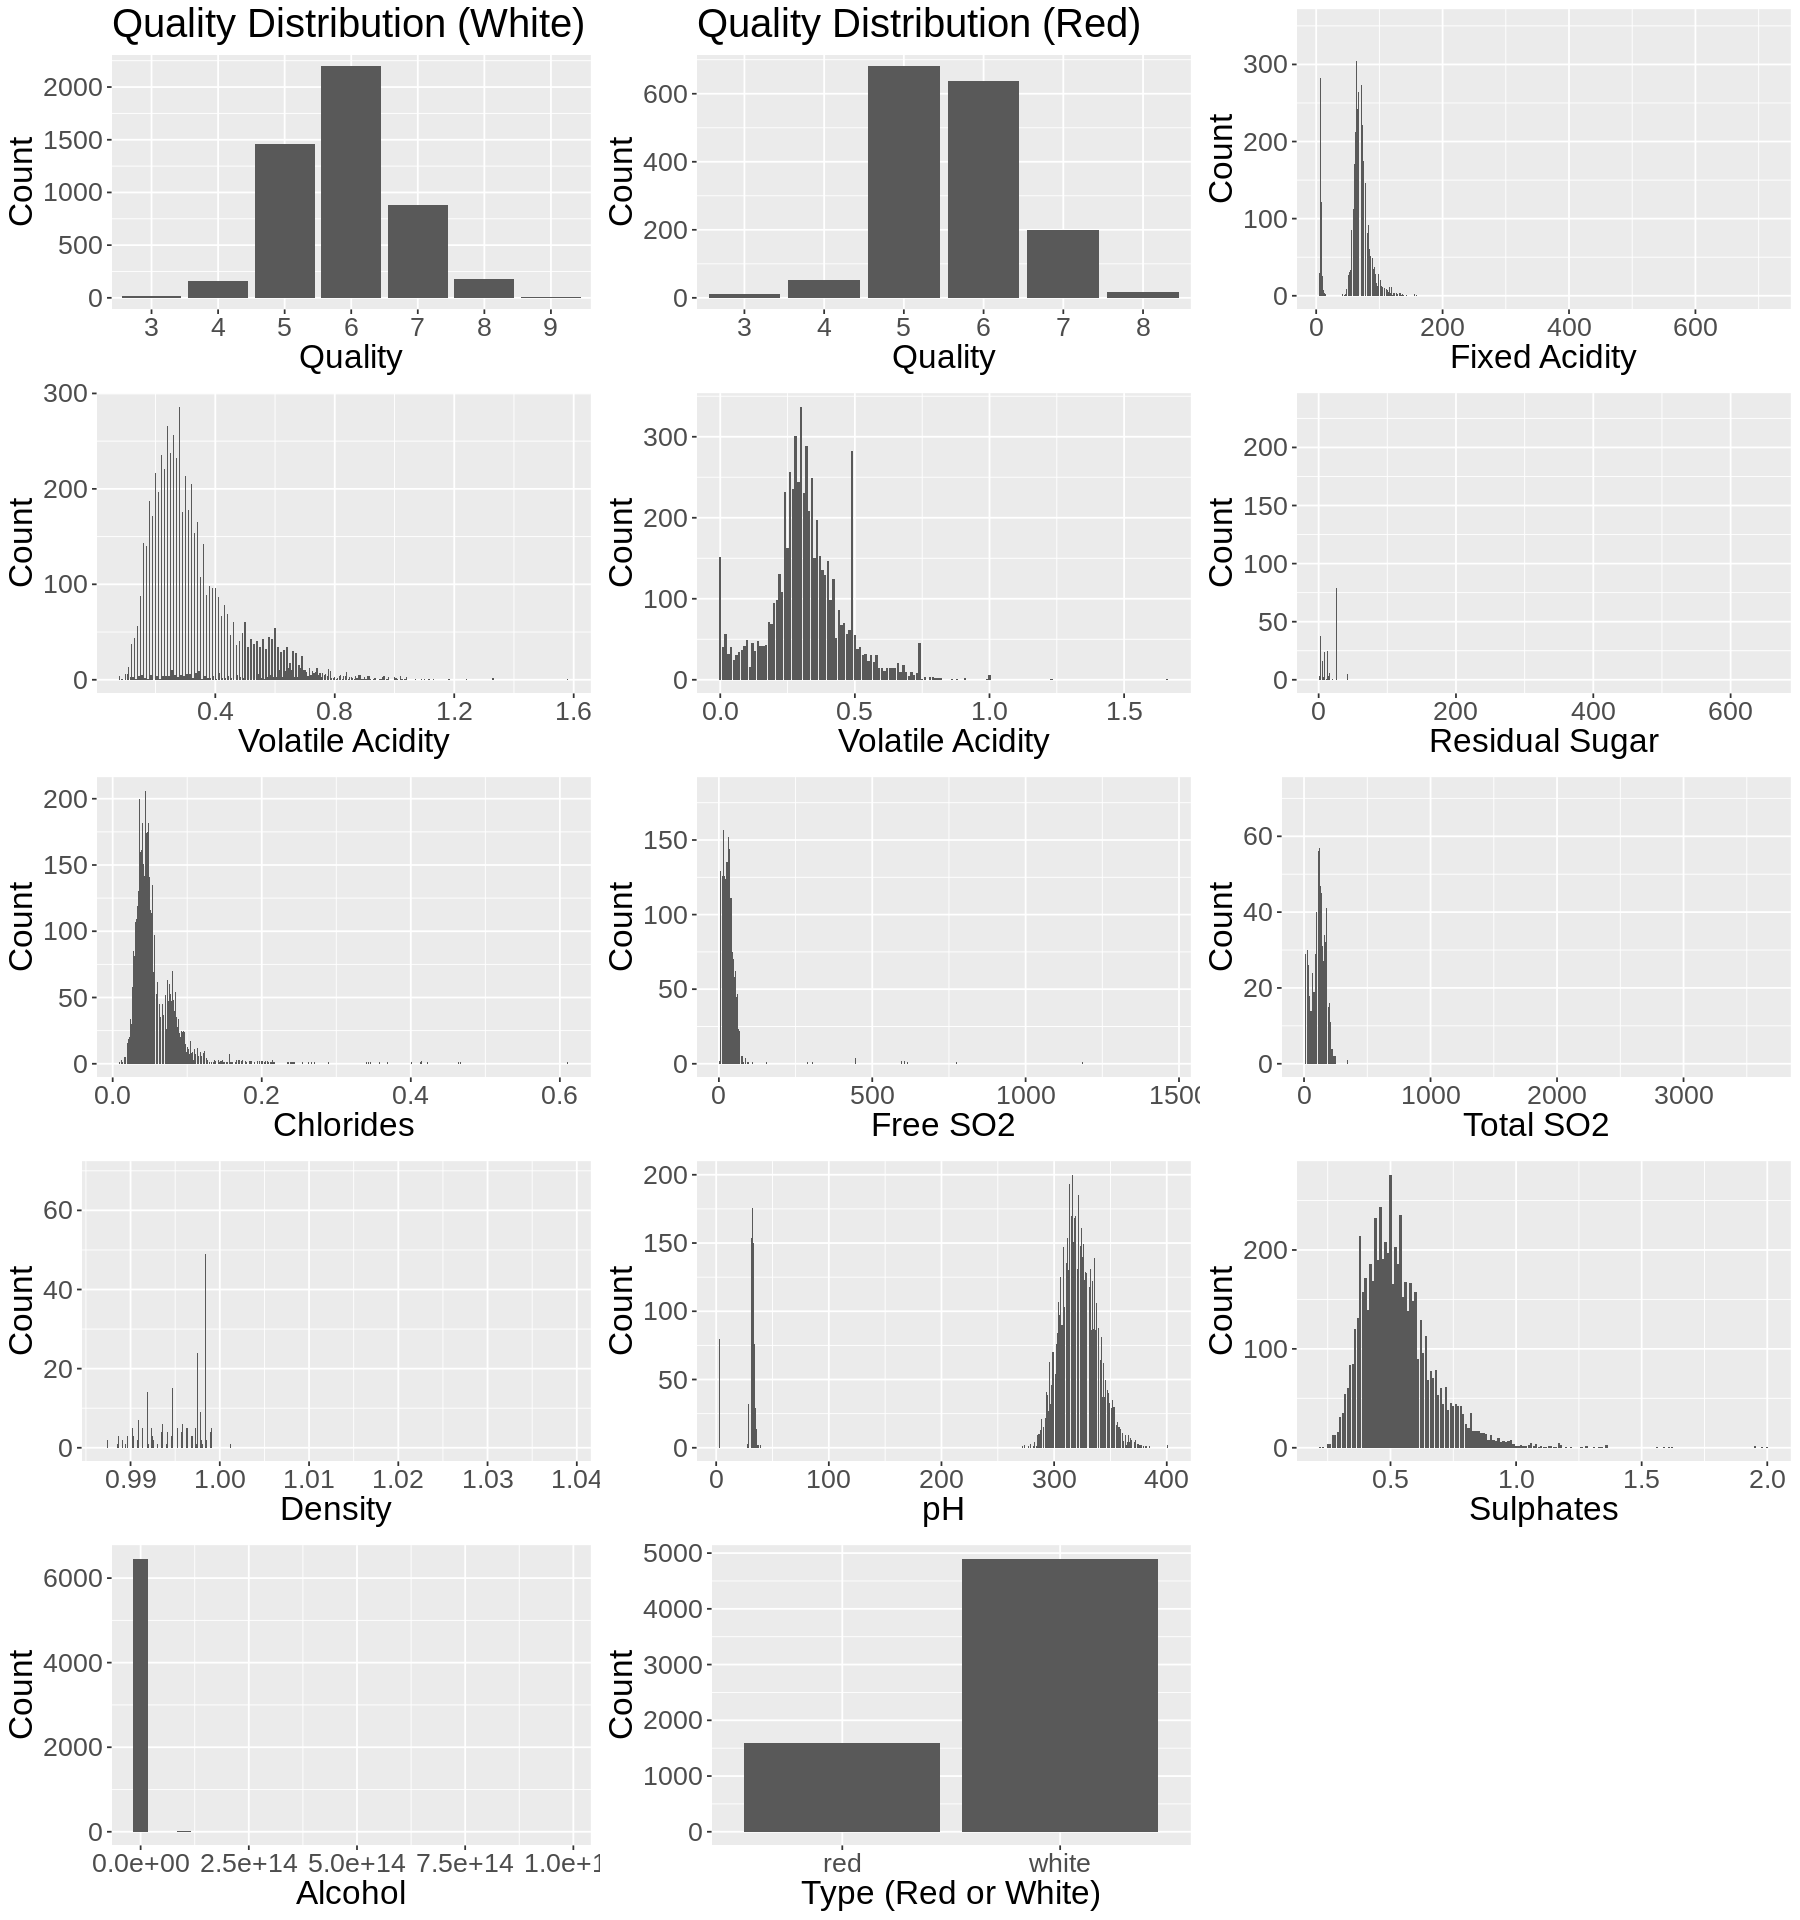

In [108]:
options(repr.plot.width = 15, repr.plot.height = 16)
grid.arrange(white_quality_dis, red_quality_dis, 
             fixed_acidity_dis, volatile_acidity_dis, citric_acid_dis, residual_sugar_dis, 
             chlorides_dis, free_SO2_dis, total_SO2_dis, density_dis, pH_dis, sulphates_dis,
             alcohol_dis, type_dis, ncol=3)

### pH vs Quality of red wine samples and white wine samples.

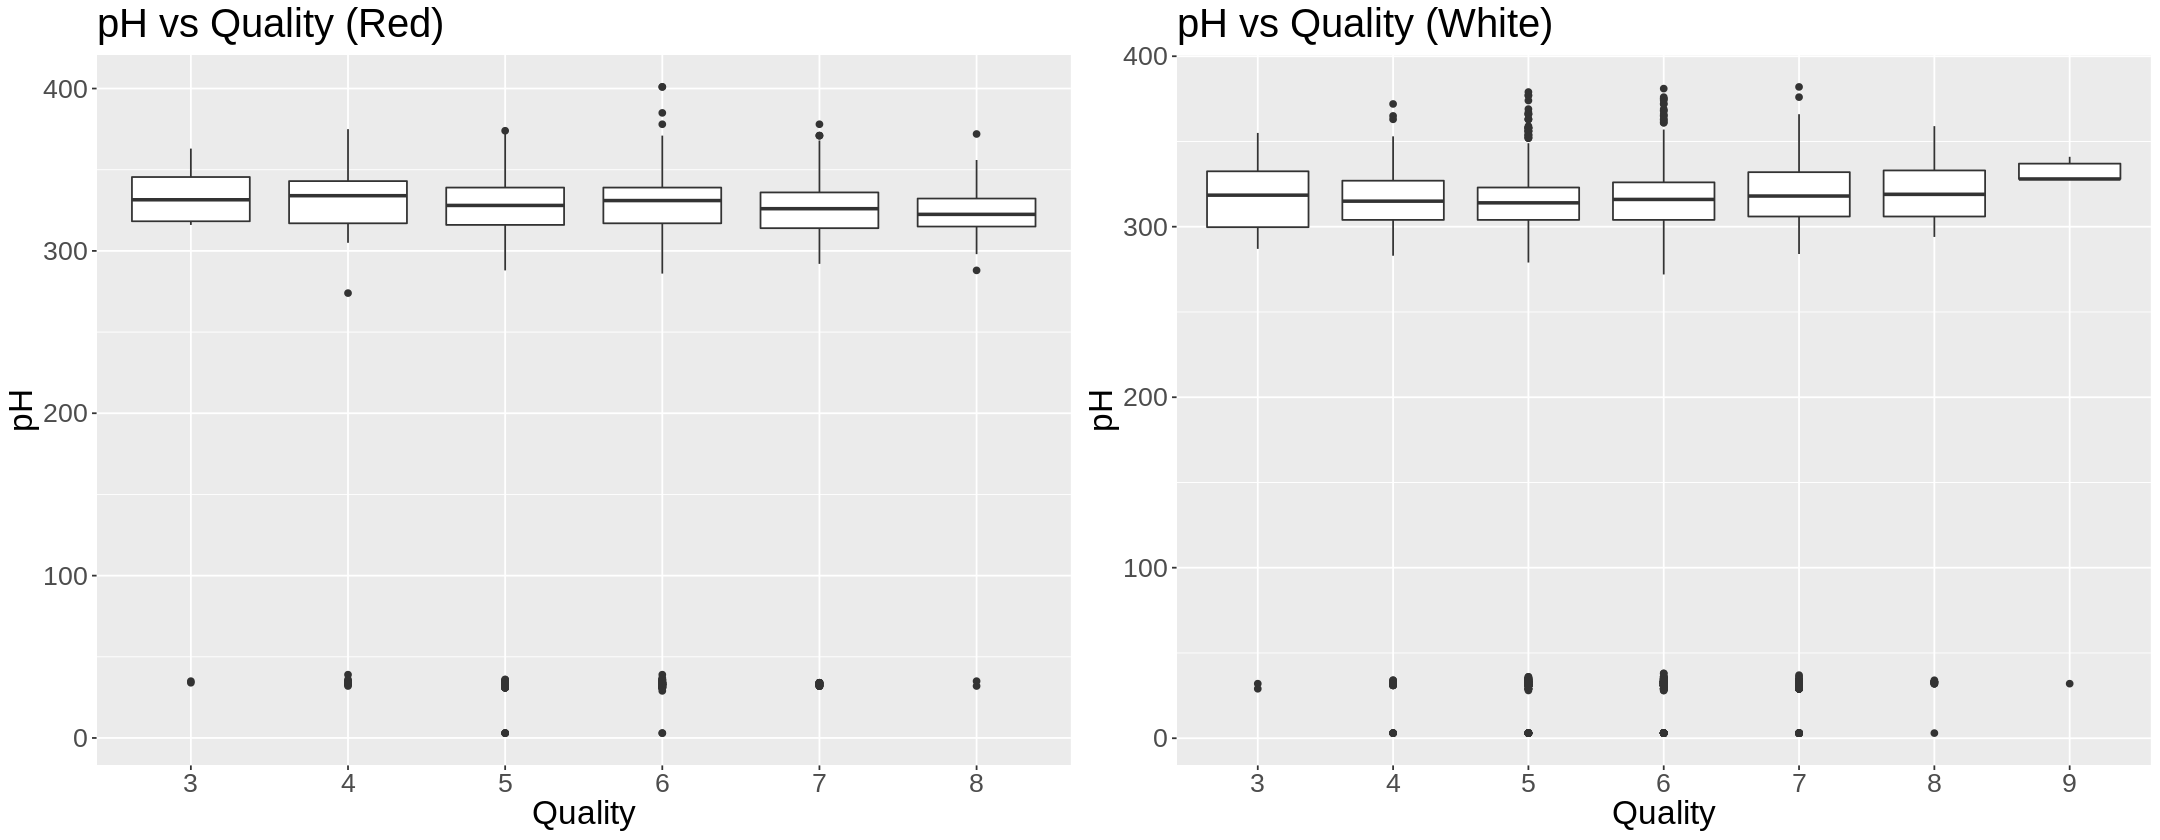

In [ ]:
options(repr.plot.width = 18, repr.plot.height = 7)
grid.arrange(red_pH_vs_quality, white_pH_vs_quality, ncol=2)